# Exercise 1

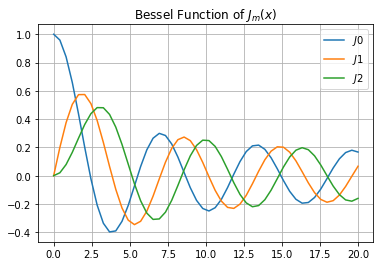

In [1]:
#Kaleb Kautzsch
#Part (i)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import pi

#Define the Bessel function as a function of theta
def J(m,x):
    '''Here we need to create the integral part of the Bessel function'''
    def f(theta):
        return np.cos(m*theta - x*np.sin(theta))
    '''Now we need to define how many points, limits, and binwidth'''
    N = 1000
    lowLim = 0
    upLim = pi
    binWidth = (upLim - lowLim)/N
    '''Enact Simpons Method of integration'''
    simp = f(upLim) + f(lowLim) + 4*f(upLim - binWidth)
    '''Since k is inside the Bessel function we need to iterate over all points'''
    for k in range(1,N//2):
        simp += 4*f(lowLim + (2*k-1)*binWidth) + 2*f(lowLim+2*k*binWidth)
    '''Finally solving for Intensity'''
    I = binWidth/3*simp/pi
    return I
#Plot of the functions within specified limits
x = np.linspace(0,20)
plt.title('Bessel Function of $J_m(x)$')
plt.grid()
plt.plot(x,J(0,x),label='$J0$')
plt.plot(x,J(1,x),label='$J1$')
plt.plot(x,J(2,x),label='$J2$')
plt.legend()
plt.show()

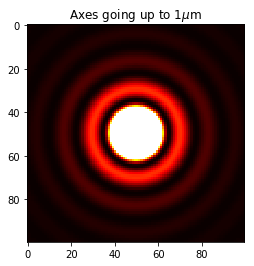

In [2]:
#Extra Credit
x,y = np.mgrid[-1:1:100j,-1:1:100j] #defining x and y to fit the plot
r = np.sqrt(x**2 + y**2) #Distance in the focal plane from the center of diffraction
wavelength = 0.5 #Micrometers
k = 2*pi/wavelength

#Intensity function from solved Bessel function
def I(r):
    return (J(1,r*k)/(k*r))**2

plt.imshow(I(r),vmax=0.1/10, cmap='hot')
plt.title('Axes going up to 1$\mu$m')
plt.show()

# Exercise 2
(i) With the substitution $$x=\frac{\hbar\omega}{k_B T}$$ we obtain

$$W = \int_0^\infty I(\omega)d\omega = \frac{\hbar}{4\pi^2c^2}\int_0^\infty \frac{\omega^3}{e^{\hbar\omega/k_BT}-1}d\omega = \frac{k_b^4T^4}{4\pi^2c^2\hbar^3}\int_0^\infty\frac{x^3}{e^x-1}dx$$

C:\Users\Dino the Dino\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


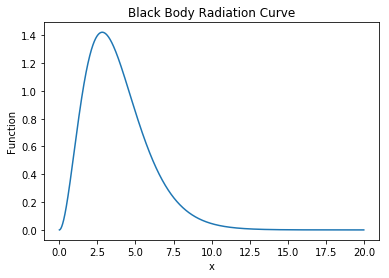

In [3]:
#Creating the integrand function
def integrand(x):
    return x**3/(np.exp(x)-1)

x = np.arange(0,20,0.01)
plt.plot(x,integrand(x))
plt.xlabel('x')
plt.ylabel('Function')
plt.title('Black Body Radiation Curve')
plt.show()

The function is rather smooth so I am going to use Gaussian quadrature to find the area under the curve. I have also tried different values of (x) for a suitable cutoff, and I am going to integrate from (0,15) to deal with the indefinite limits.

In [22]:
#Part (ii)
import scipy.integrate as integrate

#Implementing Gaussian Quadrature and comparing to different limits
lim15 = integrate.quadrature(integrand,0,15)
lim20 = integrate.quadrature(integrand,0,20)

print('Limits from 0 to 15:\t',lim15)
print('Limits from 0 to 20:\t',lim20)
print('Relative Error:\t\t',abs((lim20[0]-lim15[0])/(lim15[0])))
print('Absolute Error:\t\t',abs(lim20[0]-lim15[0]))

Limits from 0 to 15:	 (6.492671141255117, 9.124628963519399e-08)
Limits from 0 to 20:	 (6.493920200189986, 5.976715389266474e-08)
Relative Error:		 0.00019237982452744118
Absolute Error:		 0.0012490589348690406


The error is not negligible when looking at the differences in the cutoff, which is larger than just the normal numerical integration.

#### Part (iii)
By setting: $$W=\sigma T^{4}$$ equal to the integral and the constants multiplied together and solving for sigma we obtain an equation for solving for Botlzmaans constant: $$\sigma=\frac{k^{4}_B}{4 \pi^{2} c^{2} \hbar^{3}}$$

In [5]:
#Bring in the constants!!
from scipy.constants import c, hbar, k

#Solve for sigma
print('Stefan-Boltzmaan constant value: %.3g' % (k**4/4/np.pi**2/c**2/hbar**3*lim15[0]), 'W*m^-2*K^-4')

Stefan-Boltzmaan constant value: 5.67e-08 W*m^-2*K^-4


This is (as far as values after the decimal goes) an exact value for the Boltzmaans constant.

# Exercise 3

In [1]:
#Importing numpy again because I hate having to re-run everything
import numpy as np
import math

#Function for Hypershpere
def hypSphereVol(dim, iterations):
    countSphere = 0
    '''Create a for loop to iterate and measure the volume of sphere'''
    for i in range(iterations):
        point = np.random.uniform(-1.0, 1.0, dim) #Samples picked over a half inclusive interval [-1,1) of the dimensional size of sphere
        distance = np.linalg.norm(point) #Normalizing the vector
        if distance < 1.0:
            countSphere += 1
    return np.power(2.0, dim) * (countSphere/iterations) #Calculating the volume of the sphere based on the uniform point distributions

volCal = hypSphereVol(10,1000000) #You can change the dimension, but you would need to know the true value for it to be able to compare
volTru = (np.pi**5)/(math.factorial(5))

print('Calculated Volume:\t',volCal)
print('True Value:\t\t',volTru)
print('Error:\t\t\t', abs((volCal-volTru)/(volTru)*100),'%')

Calculated Volume:	 2.46272
True Value:		 2.550164039877345
Error:			 3.4289574517547834 %
